# Instructions
Complete all **Exercises**, and submit answers to **Questions** on the Coursera 
platform.

If you have access to data on an entire population, say the size of every 
house in Ames, Iowa, it's straight forward to answer questions like, "How big 
is the typical house in Ames?" and "How much variation is there in sizes of 
houses?". If you have access to only a sample of the population, as is often 
the case, the task becomes more complicated. What is your best guess for the 
typical size if you only know the sizes of several dozen houses? This sort of 
situation requires that you use your sample to make inference on what your 
population looks like.

**Setting a seed:** We will take some random samples and calculate confidence based
on these samples in this lab, which means you should set a seed on top of your lab. If 
this concept is new to you, review the previous lab and ask your TA.

Setting a seed will cause R to sample the same sample each time you knit your document.
This will make sure your results don't change each time you knit, and it will also 
ensure reproducibility of your work (by setting the same seed it will be possible to 
reproduce your results). You can set a seed like this:


In [2]:
set.seed(1986)                 # make sure to change the seed

The number above is completely arbitraty. If you need inspiration, you can use your
ID, birthday, or just a random string of numbers. The important thing is that you
use each seed only once. You only need to do this once in your R Markdown document,
but make sure it comes before sampling.
</div>


## Getting Started

### Load packages

In this lab we will explore the data using the `dplyr` package and visualize it 
using the `ggplot2` package for data visualization. The data can be found in the
companion package for this course, `statsr`.

Let's load the packages.


In [3]:
library(statsr)
library(dplyr)
library(ggplot2)


Loading required package: BayesFactor

Loading required package: coda

Loading required package: Matrix

************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### The data

We consider real estate data from the city of Ames, Iowa. This is the same 
dataset used in the previous lab. The details of 
every real estate transaction in Ames is recorded by the City Assessor's 
office. Our particular focus for this lab will be all residential home sales 
in Ames between 2006 and 2010.  This collection represents our population of 
interest. In this lab we would like to learn about these home sales by taking 
smaller samples from the full population. Let's load the data.


In [4]:
data(ames)

In this lab we'll start with a simple random sample of size 60 from the 
population. Specifically, this is a simple random sample of size 60. Note that 
the data set has information on many housing variables, but for the first 
portion of the lab we'll focus on the size of the house, represented by the 
variable `area`.


In [27]:
n <- 60
samp <- sample_n(ames, n)

### Exercise
**Exercise**: Describe the distribution of homes in your sample. What would you 
say is the "typical" size within your sample? Also state precisely what you 
interpreted "typical" to mean.
</div>


Warning message:
“position_stack requires non-overlapping x intervals”


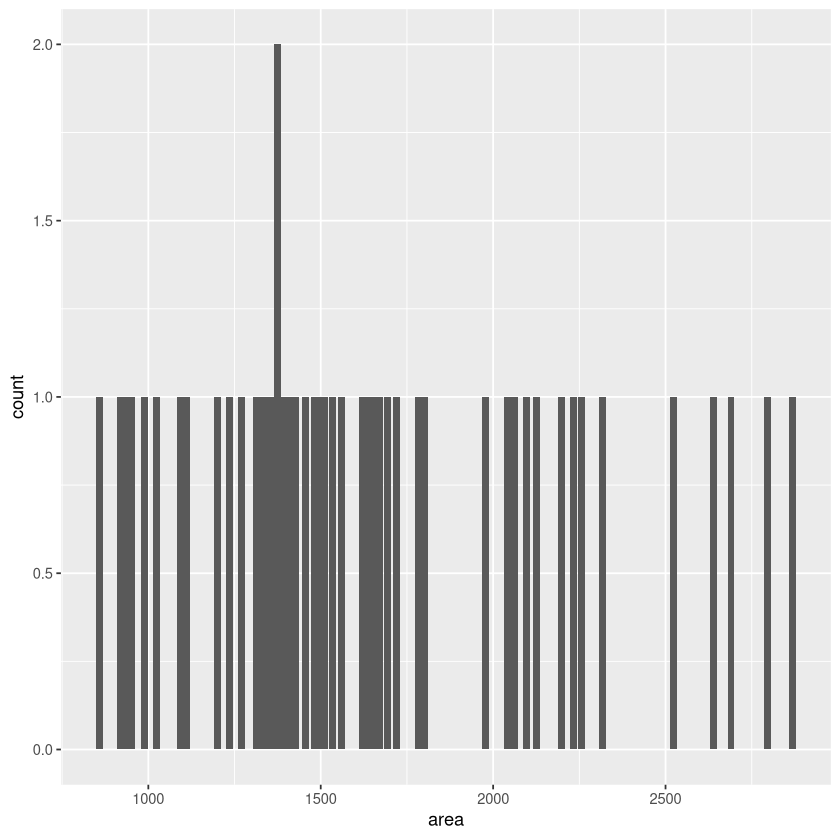

In [28]:
# type your code for the Exercise here, and Knit
ggplot(data=samp, aes(x=area)) + geom_bar(width=20)

In [29]:
samp %>%
   summarise(x_bar = mean(area), samp_med = median(area), 
            s = sd(area), samp_iqr = IQR(area),
            samp_min = min(area), samp_max = max(area),
            samp_q1 = quantile(area, 0.25),  # first quartile, 25th percentile
            samp_q3 = quantile(area, 0.75))  # third quartile, 75th percentile

x_bar,samp_med,s,samp_iqr,samp_min,samp_max,samp_q1,samp_q3
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1600.217,1495,490.5931,446,858,2868,1341,1787


**Answer**: Based on the plot and summary statistics, the sample is right skewed.

1. True or False: My distribution should be similar to others' distributions who also collect random samples from this population, but it is likely not exactly the same since it's a random sample.
<ol>
<li> True. </li>
<li> False. </li>
</ol>
**Answer**: A. Since n > 30, the distributions should be similar unless the population is significantly skewed.

## Confidence intervals

Return for a moment to the question that first motivated this lab: based on 
this sample, what can we infer about the population? Based only on this single 
sample, the best estimate of the average living area of houses sold in Ames 
would be the sample mean, usually denoted as $\bar{x}$ (here we're calling it 
`x_bar`). That serves as a good **point estimate** but it would be useful 
to also communicate how uncertain we are of that estimate. This uncertainty
can be quantified using a **confidence interval**.

A confidence interval for a population mean is of the following form
\[ \bar{x} \pm z^\star \frac{s}{\sqrt{n}} \]

You should by now be comfortable with calculating the mean and standard deviation of 
a sample in R. And we know that the sample size is 60. So the only remaining building
block is finding the appropriate critical value for a given confidence level. We can
use the `qnorm` function for this task, which will give the critical value associated
with a given percentile under the normal distribution. Remember that confidence levels
and percentiles are not equivalent. For example, a 95% confidence level refers to the
middle 95% of the distribution, and the critical value associated with this area will
correspond to the 97.5th percentile.

We can find the critical value for a 95% confidence interal using

In [32]:
z_star_95 <- qnorm(0.975) # 1-(2.5 %)
z_star_95

[1] 1.959964

which is roughly equal to the value critical value 1.96 that you're likely
familiar with by now.

Let's finally calculate the confidence interval:


In [31]:
samp %>%
  summarise(lower = mean(area) - z_star_95 * (sd(area) / sqrt(n)),
            upper = mean(area) + z_star_95 * (sd(area) / sqrt(n)))


lower,upper
<dbl>,<dbl>
1476.082,1724.352


To recap: even though we don't know what the full population looks like, we're 95% 
confident that the true average size of houses in Ames lies between the values *lower* 
and *upper*. There are a few conditions that must be met for this interval to be valid.

2.  For the confidence interval to be valid, the sample mean must be normally distributed and have standard error $s / \sqrt{n}$. Which of the following is not a condition needed for this to be true?
<ol>
<li> The sample is random. </li>
<li> The sample size, 60, is less than 10% of all houses. </li>
<li> The sample distribution must be nearly normal. </li>
</ol>

**Answer**: C. The sample distribution must be nearly normal.




## Confidence levels

3.  What does "95% confidence" mean?
<ol>
<li> 95% of the time the true average area of houses in Ames, Iowa, will be in this interval. </li>
<li> 95% of random samples of size 60 will yield confidence intervals that contain the true average area of houses in Ames, Iowa. </li>
<li> 95% of the houses in Ames have an area in this interval. </li>
<li> 95% confident that the sample mean is in this interval. </li>
</ol>

In this case we have the rare luxury of knowing the true population mean since we 
have data on the entire population. Let's calculate this value so that
we can determine if our confidence intervals actually capture it. We'll store it in a
data frame called `params` (short for population parameters), and name it `mu`.

In [ ]:
params <- ames %>%
  summarise(mu = mean(area))


<div id="exercise">
**Exercise**: Does your confidence interval capture the true average size of houses in 
Ames?
</div>


In [ ]:
# type your code for the Exercise here, and Knit



4. What proportion of 95% confidence intervals would you expect to capture the true population mean?
<ol>
<li> 1% </li>
<li> 5% </li>
<li> 95% </li>
<li> 99% </li>
</ol>

Using R, we're going to collect many samples to learn more about how sample 
means and confidence intervals vary from one sample to another.

Here is the rough outline:

-   Obtain a random sample.
-   Calculate the sample's mean and standard deviation, and use these to calculate
and store the lower and upper bounds of the confidence intervals.
-   Repeat these steps 50 times.

We can accomplish this using the `rep_sample_n` function. The following lines of 
code takes 50 random samples of size `n` from population (and remember we defined 
$n = 60$ earlier), and computes the upper and lower bounds of the confidence intervals based on these samples.


In [ ]:
ci <- ames %>%
        rep_sample_n(size = n, reps = 50, replace = TRUE) %>%
        summarise(lower = mean(area) - z_star_95 * (sd(area) / sqrt(n)),
                  upper = mean(area) + z_star_95 * (sd(area) / sqrt(n)))


Let's view the first five intervals:



In [ ]:
ci %>%
  slice(1:5)


Next we'll create a plot similar to Figure 4.8 on page 175 of [OpenIntro Statistics, 3rd
Edition](https://www.openintro.org/os). First step will be to create a new variable in 
the `ci` data frame that indicates whether the interval does or does not capture the 
true population mean. Note that capturing this value would mean the lower bound of the
confidence interval is below the value and upper bound of the confidence interval is
above the value. Remember that we create new variables using the `mutate` function.


In [ ]:
ci <- ci %>%
  mutate(capture_mu = ifelse(lower < params$mu & upper > params$mu, "yes", "no"))


The `ifelse` function is new. It takes three arguments: first is a logical statement,
second is the value we want if the logical statement yields a true result, and the
third is the value we want if the logical statement yields a false result.

We now have all the information we need to create the plot, but we need to re-organize
our data a bit for easy plotting. Specifically, we need to organize the data in a new
data frame where each row represents one bound, as opposed to one interval. So this

~~~
     lower    upper capture_mu
1 1350.540 1544.360        yes
2 1333.441 1584.425        yes
3 1412.133 1663.801        yes
...
~~~

should instead look like

~~~
  ci_id ci_bounds capture_mu
1     1  1350.540        yes
2     2  1333.441        yes
3     3  1412.133        yes
4     1  1544.360        yes
5     2  1584.425        yes
6     3  1663.801        yes
...
~~~

We can accomplish this using the following:


In [ ]:
ci_data <- data.frame(ci_id = c(1:50, 1:50),
                      ci_bounds = c(ci$lower, ci$upper),
                      capture_mu = c(ci$capture_mu, ci$capture_mu))


And finally we can create the plot using the following:



In [ ]:
ggplot(data = ci_data, aes(x = ci_bounds, y = ci_id, 
                           group = ci_id, color = capture_mu)) +
  geom_point(size = 2) +  # add points at the ends, size = 2
  geom_line() +           # connect with lines
  geom_vline(xintercept = params$mu, color = "darkgray") # draw vertical line


<div id="exercise">
**Exercise**: What proportion of your confidence intervals include the true population mean? 
Is this proportion exactly equal to the confidence level? If not, explain why.
</div>


5. What is the appropriate critical value for a 99% confidence level?
<ol>
<li> 0.01 </li>
<li> 0.99 </li> 
<li> 1.96 </li>
<li> 2.33 </li>
<li> 2.58 </li>
</ol>


In [ ]:
# type your code for the Question 5 here, and Knit



<div id="exercise">
**Exercise**: Calculate 50 confidence intervals at the 99% confidence level. You do not need to obtain new samples, simply calculate new intervals based on the 95% confidence interval endpoints you had already collected. Plot all intervals and calculate the proportion of intervals that include the true population mean.
</div>


In [ ]:
# type your code for the Exercise here, and Knit



6. We would expect 99% of the intervals to contain the true population mean.
<ol>
<li> True </li>
<li> False </li>
</ol>


<div id="license">
This is a product of OpenIntro that is released under a [Creative Commons 
Attribution-ShareAlike 3.0 Unported](http://creativecommons.org/licenses/by-sa/3.0).
This lab was written for OpenIntro by Andrew Bray and Mine &Ccedil;etinkaya-Rundel.
</div>
